# **COVID-19 Analysis**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('ECDC_COVID_19.csv')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
1,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9508,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9509,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9510,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9511,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


## **ECDC_COVID_19:DATASET DESCRIPTION**

* dateRep: The date of the reported data

* day: The day of the report (integer, e.g., 1-31).

* month: The month of the report (integer, e.g., 1-12).

* year: The year of the report (integer, e.g., 2020).

* cases: The number of new confirmed cases reported on this date.

* deaths: The number of new deaths reported on this date.

* countriesAndTerritories: The name of the country or territory to which the data belongs.

* geoId: A short geographical identifier (code) for the country or territory.

* countryterritoryCode

## Information of the dataset
* Columns = 10
* Rows = 9513
* Data types
    - float = 1
    - int64 = 5
    - object = 4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9513 entries, 0 to 9512
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  9513 non-null   object 
 1   day                      9513 non-null   int64  
 2   month                    9513 non-null   int64  
 3   year                     9513 non-null   int64  
 4   cases                    9513 non-null   int64  
 5   deaths                   9513 non-null   int64  
 6   countriesAndTerritories  9513 non-null   object 
 7   geoId                    9488 non-null   object 
 8   countryterritoryCode     9324 non-null   object 
 9   popData2018              9370 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 743.3+ KB


## Objectives

#### 1. Analyze Temporal Trends in COVID-19 Spread
Examine how daily, monthly, and yearly COVID-19 cases and deaths evolved over time to identify waves, peaks, and long-term trends across the dataset.

#### 2. Compare Country-Wise COVID-19 Impact
Determine which countries or territories reported the highest numbers of cases and deaths, and compare infection and mortality rates relative to population size.

#### 3. Evaluate Population-Adjusted Indicators
Assess the severity of the pandemic using population-normalized metrics such as cases per 100,000 and deaths per 100,000 to enable fair cross-country comparisons.

#### 4. Study Relationships Between Cases and Deaths
Investigate the correlation between daily reported cases and deaths, exploring lag effects, mortality patterns, and variations across different geographical regions.

### Column Rename

In [5]:
df.rename(columns={'dateRep':'date_Rep'},inplace=True)

In [6]:
df.rename(columns={'countriesAndTerritories':'Countries_And_Territories'},inplace=True)

In [7]:
df.rename(columns={'geoId':'geo_Id'},inplace=True)

In [8]:
df.rename(columns={'countryterritoryCode':'country_territory_Code'},inplace=True)

In [9]:
df.rename(columns={'popData2018':'pop_Data_2018'},inplace=True)

In [10]:
df.rename(str.title,axis='columns',inplace=True)

### Convert Datatype

In [11]:
df['Date_Rep']=df['Date_Rep'].astype("datetime64[ns]")

### Checking duplicates

In [12]:
df.duplicated().sum()

0

##### No duplicated values

### Checking Null Values

In [13]:
df.isnull().sum()

Date_Rep                       0
Day                            0
Month                          0
Year                           0
Cases                          0
Deaths                         0
Countries_And_Territories      0
Geo_Id                        25
Country_Territory_Code       189
Pop_Data_2018                143
dtype: int64

In [14]:
df.dropna(subset='Geo_Id',inplace=True)

In [15]:
df['Pop_Data_2018']=df['Pop_Data_2018'].fillna(df['Pop_Data_2018'].median())

### Checking null values and fill in the column country territory code

In [16]:
null_country=df[df['Country_Territory_Code'].isnull()]
null_country

,Date_Rep,Day,Month,Year,Cases,Deaths,Countries_And_Territories,Geo_Id,Country_Territory_Code,Pop_Data_2018
260,2020-04-08,8,4,2020,0,0,Anguilla,AI,NaN,10627165.0
261,2020-04-07,7,4,2020,0,0,Anguilla,AI,NaN,10627165.0
262,2020-04-06,6,4,2020,0,0,Anguilla,AI,NaN,10627165.0
263,2020-04-05,5,4,2020,0,0,Anguilla,AI,NaN,10627165.0
264,2020-04-04,4,4,2020,0,0,Anguilla,AI,NaN,10627165.0
...,...,...,...,...,...,...,...,...,...,...
2979,2020-04-08,8,4,2020,3,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2980,2020-04-07,7,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2981,2020-04-06,6,4,2020,1,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2982,2020-04-05,5,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0


In [17]:
null_country['Countries_And_Territories'].unique()

array(['Anguilla', 'Bonaire, Saint Eustatius and Saba',
       'Cases_on_an_international_conveyance_Japan', 'Czechia',
       'Falkland_Islands_(Malvinas)'], dtype=object)

In [18]:
df[df['Countries_And_Territories']=='Anguilla']

,Date_Rep,Day,Month,Year,Cases,Deaths,Countries_And_Territories,Geo_Id,Country_Territory_Code,Pop_Data_2018
260,2020-04-08,8,4,2020,0,0,Anguilla,AI,NaN,10627165.0
261,2020-04-07,7,4,2020,0,0,Anguilla,AI,NaN,10627165.0
262,2020-04-06,6,4,2020,0,0,Anguilla,AI,NaN,10627165.0
263,2020-04-05,5,4,2020,0,0,Anguilla,AI,NaN,10627165.0
264,2020-04-04,4,4,2020,0,0,Anguilla,AI,NaN,10627165.0
265,2020-04-03,3,4,2020,1,0,Anguilla,AI,NaN,10627165.0
266,2020-04-02,2,4,2020,0,0,Anguilla,AI,NaN,10627165.0
267,2020-04-01,1,4,2020,0,0,Anguilla,AI,NaN,10627165.0
268,2020-03-31,31,3,2020,0,0,Anguilla,AI,NaN,10627165.0
269,2020-03-30,30,3,2020,0,0,Anguilla,AI,NaN,10627165.0


In [19]:
df.loc[260:272].fillna('AIA',inplace=True)

In [20]:
df[df['Countries_And_Territories']=='Bonaire, Saint Eustatius and Saba']

,Date_Rep,Day,Month,Year,Cases,Deaths,Countries_And_Territories,Geo_Id,Country_Territory_Code,Pop_Data_2018
1199,2020-04-08,8,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0
1200,2020-04-07,7,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0
1201,2020-04-06,6,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0
1202,2020-04-05,5,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0
1203,2020-04-04,4,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0
1204,2020-04-03,3,4,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0
1205,2020-04-02,2,4,2020,2,0,"Bonaire, Saint Eustatius and Saba",BQ,NaN,10627165.0


In [21]:
df.loc[1199:1205].fillna('BES',inplace=True)

In [22]:
df[df['Countries_And_Territories']=='Cases_on_an_international_conveyance_Japan']

,Date_Rep,Day,Month,Year,Cases,Deaths,Countries_And_Territories,Geo_Id,Country_Territory_Code,Pop_Data_2018
1682,2020-03-10,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1683,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1684,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1685,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1686,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
...,...,...,...,...,...,...,...,...,...,...
1741,2020-01-04,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1742,2020-01-03,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1743,2020-01-02,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0
1744,2020-01-01,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0


In [23]:
df.loc[1682:1745].fillna('IC Japan',inplace=True)

In [24]:
df[df['Countries_And_Territories']=='Czechia']

,Date_Rep,Day,Month,Year,Cases,Deaths,Countries_And_Territories,Geo_Id,Country_Territory_Code,Pop_Data_2018
2222,2020-04-08,8,4,2020,195,10,Czechia,CZ,NaN,10627165.0
2223,2020-04-07,7,4,2020,235,11,Czechia,CZ,NaN,10627165.0
2224,2020-04-06,6,4,2020,115,8,Czechia,CZ,NaN,10627165.0
2225,2020-04-05,5,4,2020,282,6,Czechia,CZ,NaN,10627165.0
2226,2020-04-04,4,4,2020,332,9,Czechia,CZ,NaN,10627165.0
...,...,...,...,...,...,...,...,...,...,...
2317,2020-01-04,4,1,2020,0,0,Czechia,CZ,NaN,10627165.0
2318,2020-01-03,3,1,2020,0,0,Czechia,CZ,NaN,10627165.0
2319,2020-01-02,2,1,2020,0,0,Czechia,CZ,NaN,10627165.0
2320,2020-01-01,1,1,2020,0,0,Czechia,CZ,NaN,10627165.0


In [25]:
df.loc[2222:2321].fillna('CZE',inplace=True)

In [26]:
df[df['Countries_And_Territories']=='Falkland_Islands_(Malvinas)']

,Date_Rep,Day,Month,Year,Cases,Deaths,Countries_And_Territories,Geo_Id,Country_Territory_Code,Pop_Data_2018
2979,2020-04-08,8,4,2020,3,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2980,2020-04-07,7,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2981,2020-04-06,6,4,2020,1,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2982,2020-04-05,5,4,2020,0,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0
2983,2020-04-04,4,4,2020,1,0,Falkland_Islands_(Malvinas),FK,NaN,10627165.0


In [27]:
df.loc[2979:2983].fillna('FLK',inplace=True)

In [28]:
covid_theme_palette = {
    'cases': '#1D4ED8',                 # medical blue
    'deaths': '#B91C1C',                # deep crimson
    'population': '#475569',            # slate gray
    'date': '#1E293B',                  # charcoal
    'day': '#6B7280',                   # cool gray
    'month': '#6366F1',                 # soft indigo
    'year': '#3B82F6',                  # neutral blue
    'countries': '#059669',             # viridian green
    'geo_id': '#78716C',                # warm gray
    'country_code': '#64748B'           # steel gray
}


In [29]:
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 11,
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.titlecolor': '#1E293B',
    'axes.labelsize': 13,
    'axes.labelweight': 'semibold',
    'axes.labelcolor': '#1E293B',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.color': '#475569',
    'ytick.color': '#475569',
    'legend.fontsize': 11,
    'grid.color': '#94A3B8',
    'grid.linestyle': '--',
    'grid.linewidth': 0.6,
    'axes.edgecolor': '#64748B',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

# Analysis

### Daily COVID-19 Cases Over Time

In [30]:
daily_cases_global = df.groupby('Date_Rep')['Cases'].sum()
top10_date = (df.groupby('Date_Rep')['Cases'].sum().sort_values(ascending=False).head(10).reset_index())


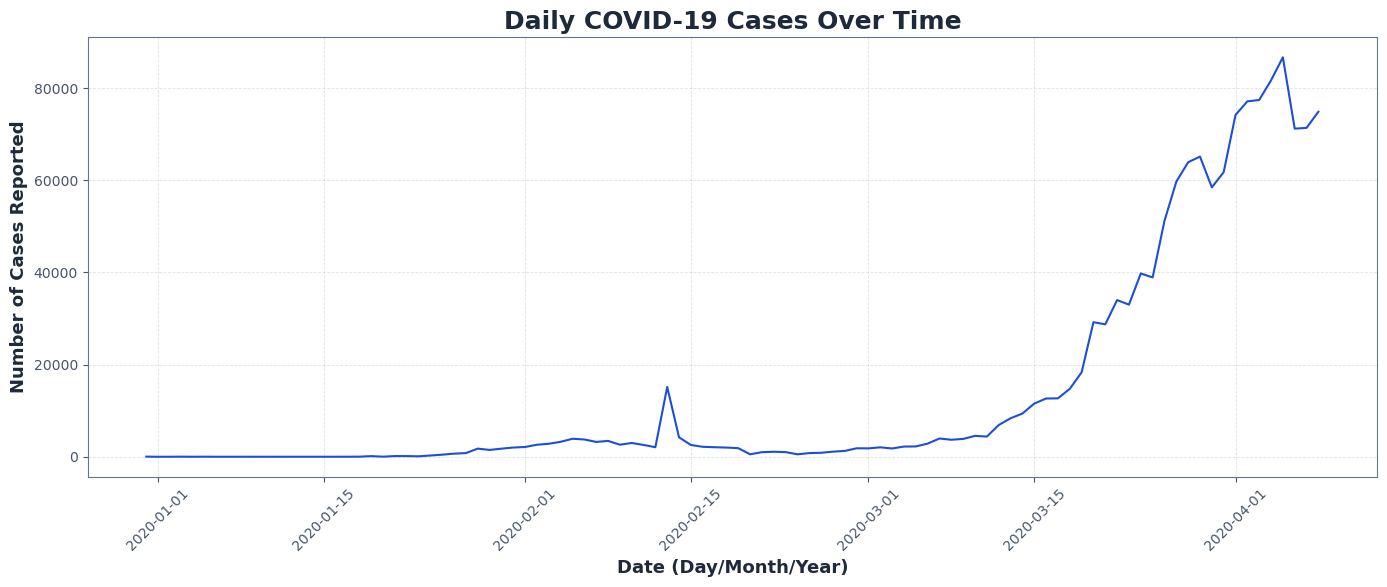

In [31]:
plt.figure(figsize=(14,6))
plt.plot(daily_cases_global.index, daily_cases_global.values, color=covid_theme_palette['cases'])

plt.title("Daily COVID-19 Cases Over Time", color=covid_theme_palette['date'])
plt.xlabel("Date (Day/Month/Year)", color=covid_theme_palette['date'])
plt.ylabel("Number of Cases Reported", color=covid_theme_palette['date'])

plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



- Daily cases remain very low through early 2020, with a small spike around mid-February.
- From March onward, cases begin to rise steadily.
- A sharp surge occurs in late March, followed by a rapid acceleration into early April.
- The highest daily counts appear in early April, exceeding **80,000** cases.


### Top 10 Dates With the Highest COVID-19 Case Counts

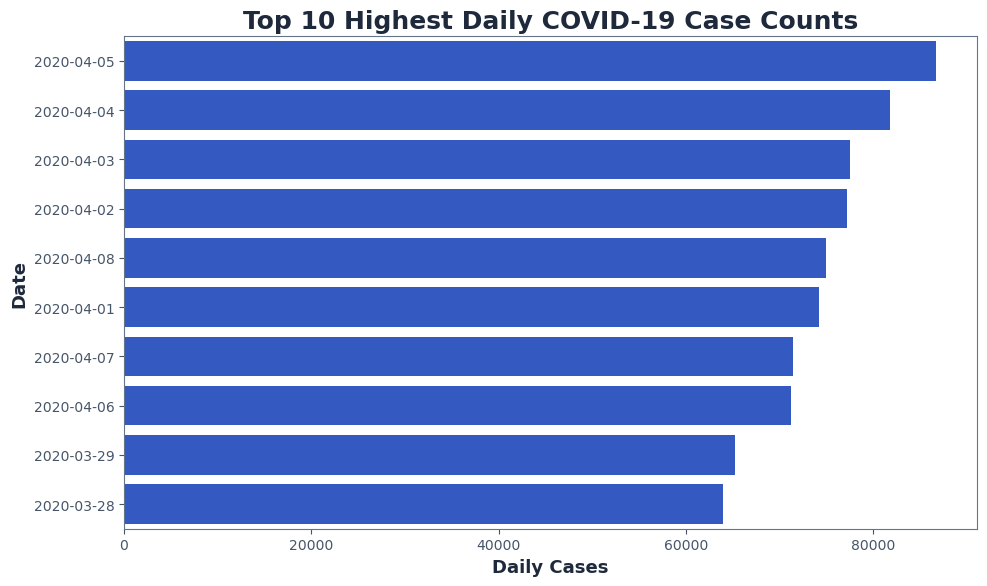

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(y="Date_Rep", x="Cases", data=top10_date, color=covid_theme_palette['cases'])

plt.title("Top 10 Highest Daily COVID-19 Case Counts", color=covid_theme_palette['date'])
plt.xlabel("Daily Cases", color=covid_theme_palette['date'])
plt.ylabel("Date", color=covid_theme_palette['date'])

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



- The highest daily COVID-19 case count occurred on **2020-04-05** (about **85k+** cases).
- Most of the top 10 days fall between **April 2–8, 2020**, indicating a strong surge during this period.
- Two late-March dates also appear, showing the rise began before April.
- All top-10 days range from **~65k to 85k** cases, clustered within about two weeks.


### Daily COVID-19 Deaths Over Time

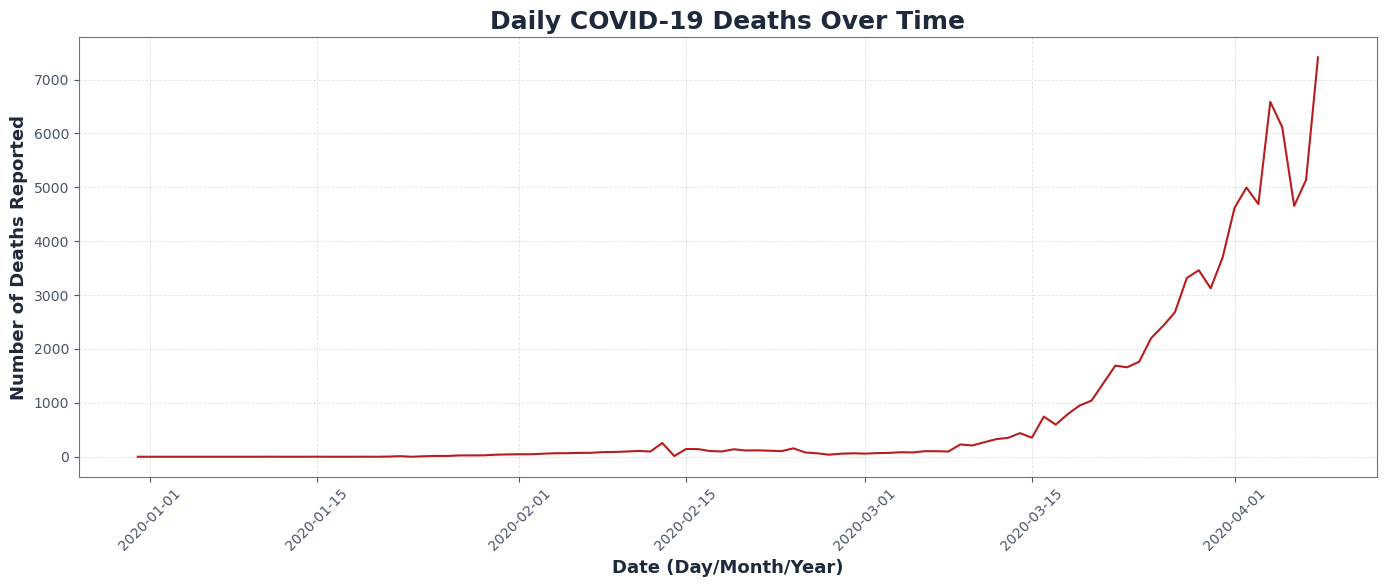

In [33]:
daily_deaths_global = (df.groupby("Date_Rep")["Deaths"].sum().sort_index())

plt.figure(figsize=(14,6))

plt.plot(daily_deaths_global.index, daily_deaths_global.values, color=covid_theme_palette['deaths'])

plt.title("Daily COVID-19 Deaths Over Time", color=covid_theme_palette['date'])
plt.xlabel("Date (Day/Month/Year)", color=covid_theme_palette['date'])
plt.ylabel("Number of Deaths Reported", color=covid_theme_palette['date'])

plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Daily COVID-19 deaths remained **very low through January and early February 2020**.
- A **slight increase** appears in late February, indicating the start of wider spread.
- **March 2020 shows a sharp upward trend**, with deaths rising steadily throughout the month.
- By late March and early April, deaths **spike dramatically**, surpassing **6,000–7,000 per day**, showing rapid escalation.
- The curve indicates an **accelerating outbreak**, with no signs of decline by early April 2020.


### Monthly Average COVID-19 Cases

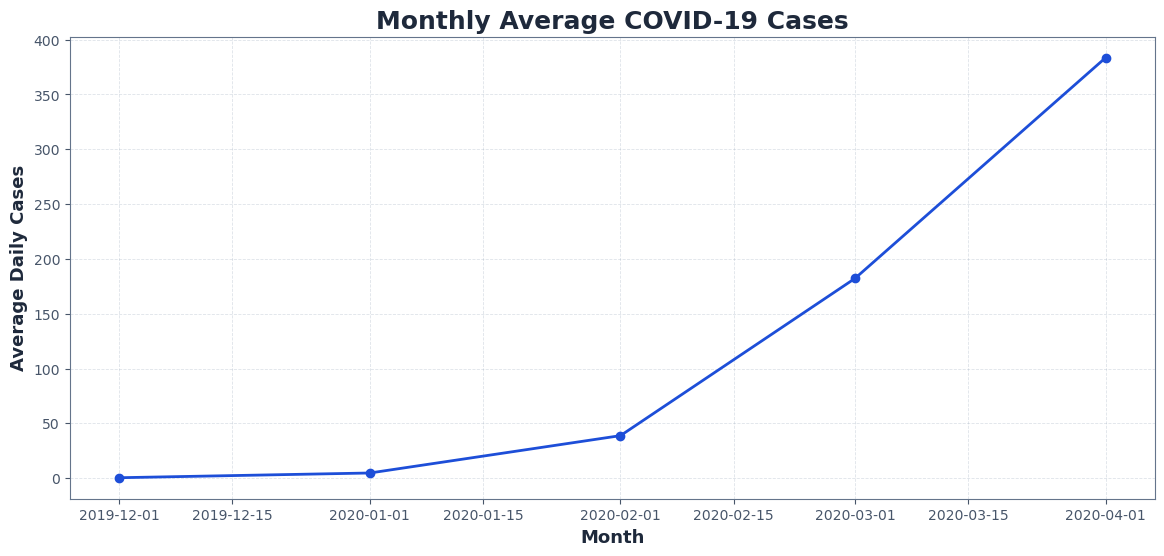

In [34]:
monthly_cases = (df.groupby(["Year", "Month"])["Cases"].mean().reset_index())
monthly_cases["Date"] = pd.to_datetime(monthly_cases["Year"].astype(str) + "-" + monthly_cases["Month"].astype(str) + "-01")

plt.figure(figsize=(14,6))
plt.plot(monthly_cases["Date"], monthly_cases["Cases"], marker="o", color=covid_theme_palette['cases'], linewidth=2)

plt.title("Monthly Average COVID-19 Cases")
plt.xlabel("Month")
plt.ylabel("Average Daily Cases")

plt.grid(alpha=0.3)
plt.show()

- Average daily COVID-19 cases were **near zero in December 2019**.
- A **small rise** occurred in **January 2020**, indicating early spread.
- Cases increased more noticeably by **February 2020** (~40 average daily cases).
- A **sharp surge** happened in **March 2020** (~180 daily cases).
- By **April 2020**, average daily cases reached **their highest level (~380)**, showing rapid escalaton.


### Top 10 Countries by Total Cases

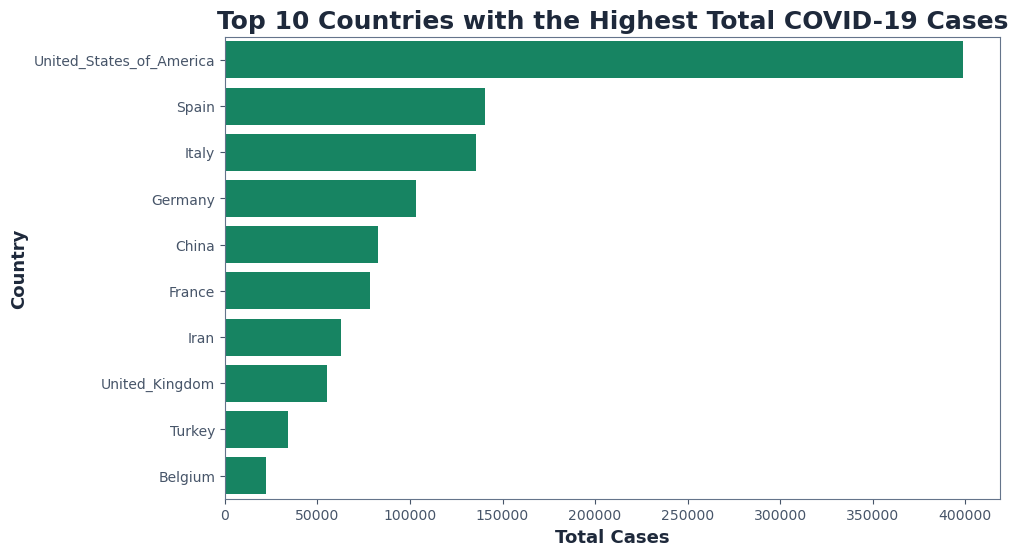

In [35]:
country_cases = df.groupby("Countries_And_Territories")["Cases"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_cases.values,  y=country_cases.index,  color=covid_theme_palette['countries'])

plt.title("Top 10 Countries with the Highest Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()


- **USA** had the highest total cases (~400k), far exceeding all others.
- **Spain** and **Italy** followed next with ~140k–150k cases.
- **Germany**, **China**, and **France** had moderate totals (~80k–100k).
- **Iran**, **UK**, and **Turkey** showed lower case numbers (~40k–70k).
- **Belgium** had the fewest cases among the top 10 (~20k–3k).


### Cases per 100,000 Population

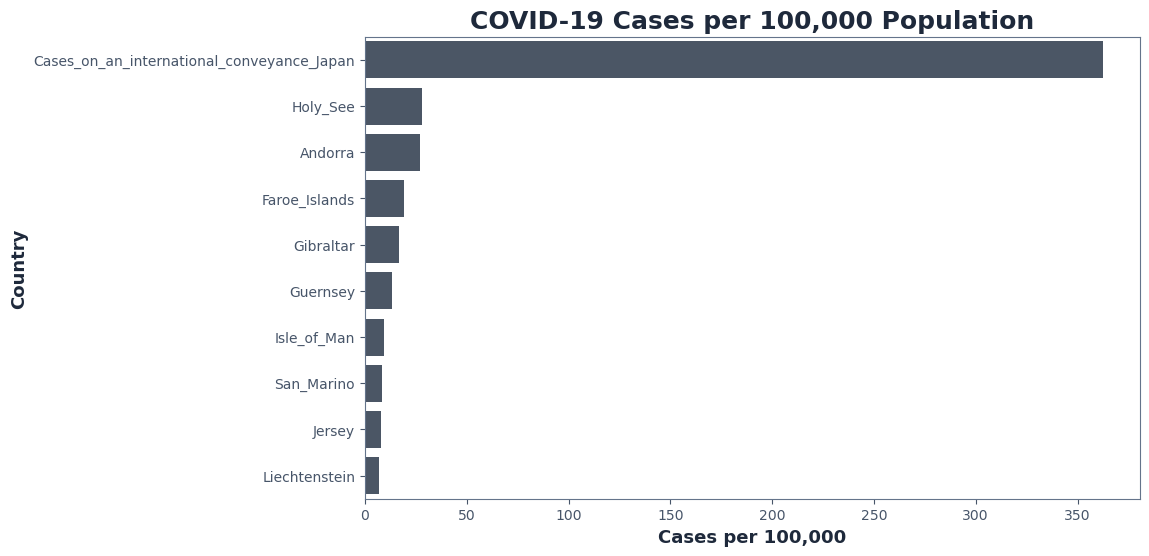

In [36]:
df["cases_per_100k"] = df["Cases"] / df["Pop_Data_2018"] * 100000
per_capita = df.groupby("Countries_And_Territories")["cases_per_100k"].mean().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=per_capita.values, y=per_capita.index, color=covid_theme_palette['population'])

plt.title("COVID-19 Cases per 100,000 Population")
plt.xlabel("Cases per 100,000")
plt.ylabel("Country")
plt.show()


- The **international conveyance (Japan)** shows an extremely high case rate per 100,000 population, far higher than any country—this is due to its very small population denominator.
- **Holy See, Andorra, and the Faroe Islands** have the highest case rates among actual countries, reflecting small populations where even modest case counts produce high per-capita values.
- **Gibraltar, Guernsey, Isle of Man, San Marino, Jersey, and Liechtenstein** also rank high, again largely due to small population sizes.
- Overall, **small-population territories dominate the highest per-capita case rates**, not necessarily because of large outbreaks but because **small denominators amplify per-capita metrics**.

### Top 10 Countries by Annual COVID-19 Cases

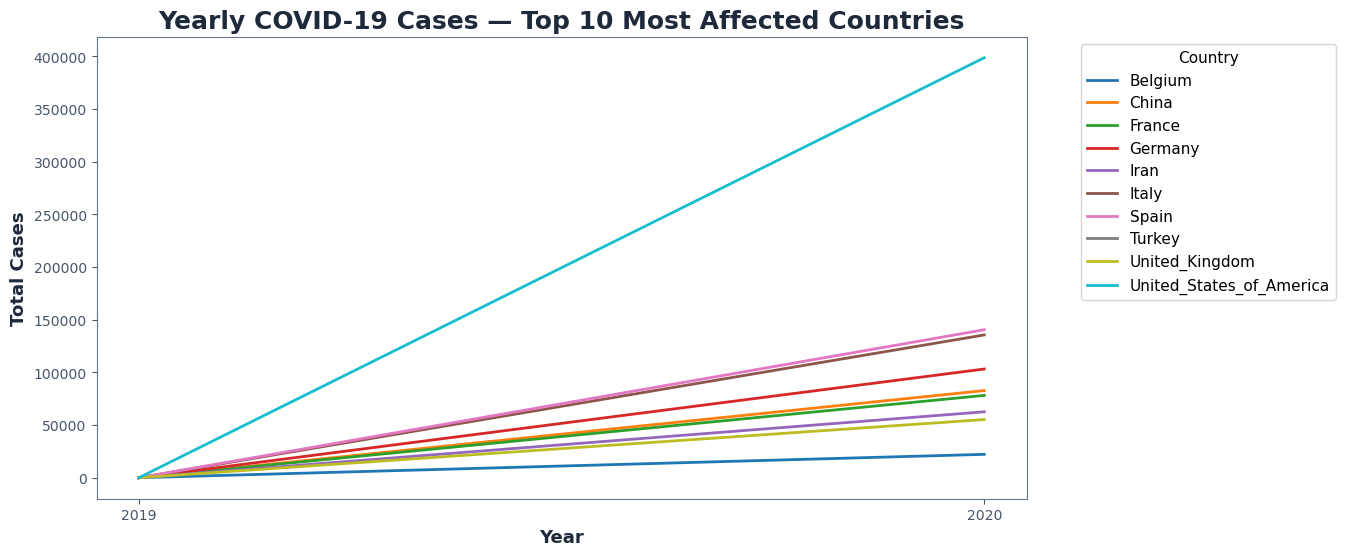

In [37]:
yearly_cases = df.groupby(["Countries_And_Territories","Year"])["Cases"].sum().reset_index()
top10 = yearly_cases.groupby("Countries_And_Territories")["Cases"].sum().nlargest(10).index
filtered = yearly_cases[yearly_cases["Countries_And_Territories"].isin(top10)]
filtered["Year"] = filtered["Year"].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x="Year", y="Cases", hue="Countries_And_Territories", palette="tab10", linewidth=2)

plt.title("Yearly COVID-19 Cases — Top 10 Most Affected Countries")
plt.xlabel("Year")
plt.ylabel("Total Cases")

plt.legend(title="Country", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


- All top 10 countries show a **sharp increase** in COVID-19 cases from 2019 to 2020.
- The **United States** experienced by far the **largest jump**, ending 2020 with the highest total cases among the group.
- **Spain, Italy, Iran, and the United Kingdom** show the next-largest increases, forming a high-rising cluster below the U.S.
- **Germany, France, Turkey, Belgium, and China** show more moderate growth compared with the top-rising countries.
- China’s increase is comparatively **small**, indicating early stabilization relative to others.

### Scatter: Total Cases vs Population

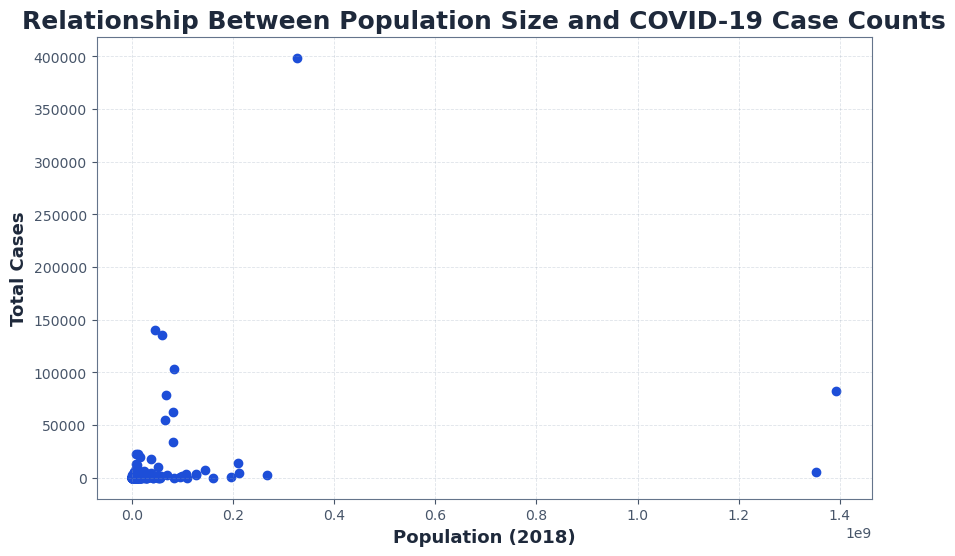

In [38]:
pop_vs_cases = df.groupby("Countries_And_Territories").agg({"Cases": "sum", "Pop_Data_2018": "mean"}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(pop_vs_cases["Pop_Data_2018"], pop_vs_cases["Cases"], color=covid_theme_palette['cases'])

plt.title("Relationship Between Population Size and COVID-19 Case Counts")
plt.xlabel("Population (2018)")
plt.ylabel("Total Cases")

plt.grid(alpha=0.3)
plt.show()


- Population size does **not** show a strong correlation with total COVID-19 cases.
- Most countries cluster at **low population and low case counts**.
- A few **mid-population countries** are major outliers with very high case totals.
- Even **large-population countries** do not necessarily have high case counts.
- Overall, factors beyond population (e.g., policies, timing, testing) likely influenced case numbers more.

### Mortality Rate per Country

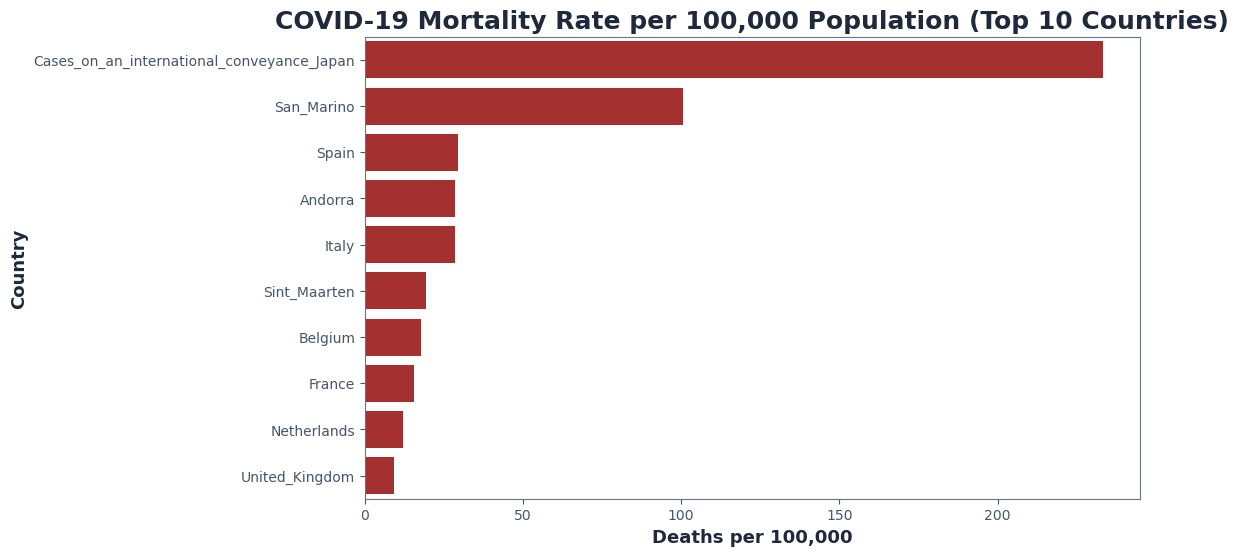

In [39]:
mortality = df.groupby("Countries_And_Territories").agg({"Deaths":"sum", "Pop_Data_2018":"mean"})
mortality["deaths_per_100k"] = mortality["Deaths"] / mortality["Pop_Data_2018"] * 100000
top_mortality = mortality["deaths_per_100k"].nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_mortality.values, y=top_mortality.index, color=covid_theme_palette['deaths'])

plt.title("COVID-19 Mortality Rate per 100,000 Population (Top 10 Countries)")
plt.xlabel("Deaths per 100,000")
plt.ylabel("Country")
plt.show()


- The chart lists the **top 10 countries with the highest COVID-19 mortality rates per 100,000 population**.  
- A unique entry, **Cases on an international conveyance (Japan)**, shows the highest mortality rate, likely due to a very small population denominator.  
- **San Marino** has the highest rate among actual countries, followed by **Spain, Andorra, and Italy**, indicating severe early outbreaks.  
- The remaining countries (Sint Maarten, Belgium, France, Netherlands, United Kingdom) also show elevated mortality rates, reflecting significant national impac.



### Daily Correlation: Cases vs Deaths

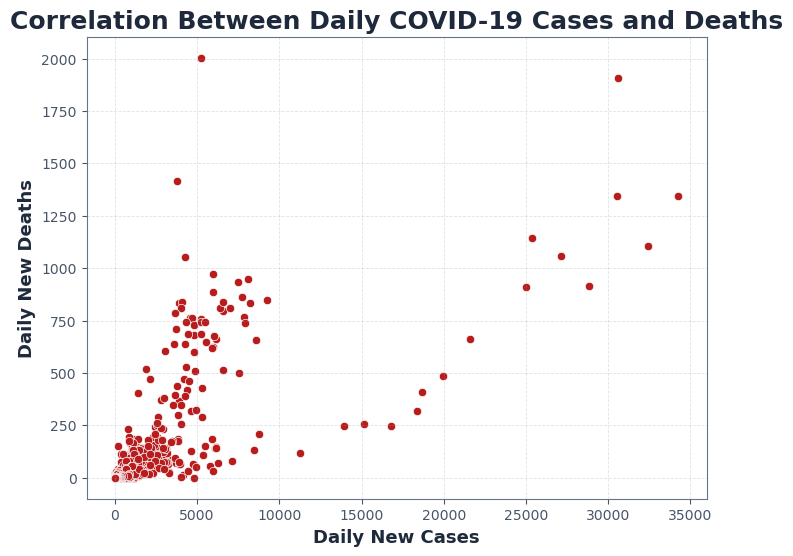

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Cases"],  y=df["Deaths"],  color=covid_theme_palette['deaths'])

plt.title("Correlation Between Daily COVID-19 Cases and Deaths")
plt.xlabel("Daily New Cases")
plt.ylabel("Daily New Deaths")
plt.grid(alpha=0.3)
plt.show()


- There is a clear **positive correlation** between daily new cases and daily new deaths.  
- Most data points cluster at **lower case and death counts**, indicating many days with relatively low activity.  
- As case numbers increase, the **variability in deaths also increases**, suggesting differing severity across waves.  
- A few **extreme outliers** represent major surges or reporting spikes.

### Lag Effect (7-Day Shift)

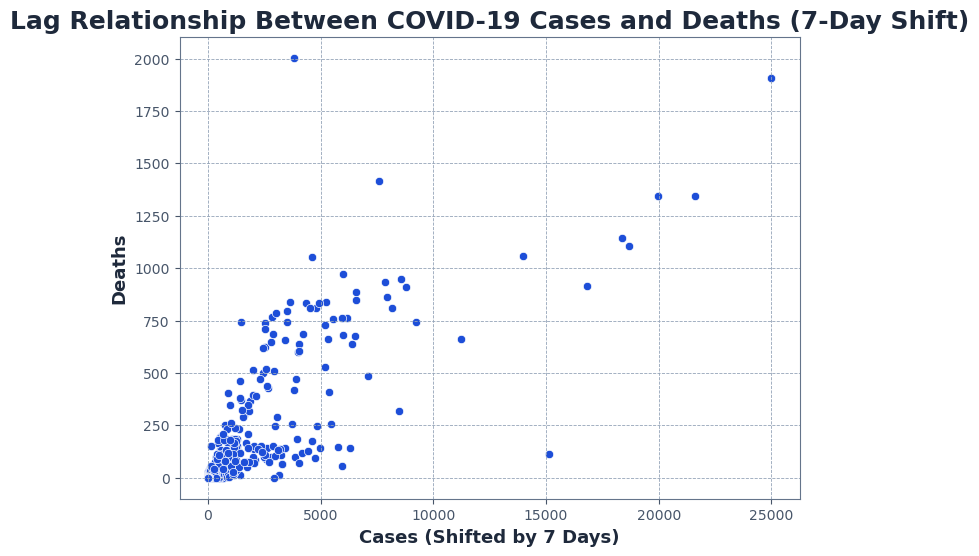

In [41]:
Covid_19_sorted = df.sort_values(["Countries_And_Territories","Date_Rep"])
Covid_19_sorted["Cases_shift7"] = Covid_19_sorted.groupby("Countries_And_Territories")["Cases"].shift(7)
lag_data = Covid_19_sorted.dropna(subset=["Cases_shift7"])

plt.figure(figsize=(8,6))
sns.scatterplot(x=lag_data["Cases_shift7"], y=lag_data["Deaths"], color=covid_theme_palette['cases'])

plt.title("Lag Relationship Between COVID-19 Cases and Deaths (7-Day Shift)")
plt.xlabel("Cases (Shifted by 7 Days)")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()


- There is a clear **positive relationship** between COVID-19 cases (shifted by 7 days) and deaths.  
- The relationship shows **high variability**, especially at higher case levels.  
- Most points cluster at **low cases and low deaths**, with some notable outliers during major waves.  
- Overall, the plot suggests a **7-day lag effect**, but other factors also influence death counts.

# COVID-19 Dataset: Key Insights

- **Rapid Global Escalation:** Minimal cases through Jan 2020, sharp surge from March, peaking in early April (~80k daily cases, 6k–7k daily deaths).  
- **Uneven Country Impact:** U.S. had the highest total cases; Europe (Spain, Italy, UK, France, Germany) formed the first major epicenter after China.  
- **Per-Capita Perspective:** Small territories (San Marino, Andorra, Holy See, Faroe Islands) show highest cases/deaths per 100k due to small populations.  
- **Mortality Hotspots:** European microstates and Spain/Italy had the highest death rates, reflecting severe early outbreaks.  
- **Cases–Deaths Correlation:** Strong positive correlation, clearer with a 7-day lag, consistent with disease progression.  
- **Population Not a Main Driver:** Case totals influenced more by policy, testing, and interventions than population size.  
- **Fast Intensification:** Monthly averages show rapid escalation from Feb–Apr 2020, marking transition to a global crisis.

# Overall Recommendation

To mitigate the impact of future COVID-19 waves or similar pandemics, countries should focus on:  

- **Early Detection & Testing:** Rapid identification of cases to prevent exponential spread.  
- **Targeted Interventions:** Implement timely measures (lockdowns, social distancing, travel restrictions) before cases escalate.  
- **Healthcare Preparedness:** Strengthen capacity to handle surges in hospitalizations and deaths.  
- **Population-Aware Strategies:** Consider per-capita metrics and small-population vulnerabilities when allocating resources.  
- **Data-Driven Policies:** Monitor case-death trends and lag effects to guide interventions effectively.  
